In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [2]:
df = pd.read_csv("C:/Users/hensi/Downloads/nasa.csv")
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
df.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [4]:
df['Hazardous'].value_counts()
df['Hazardous'] = df['Hazardous'].map({True: 1, False: 0})

In [5]:
df['Close Approach Date'].value_counts()

Close Approach Date
2016-07-22    18
2015-01-15    17
2015-02-15    16
2012-03-15    16
2014-11-22    16
              ..
2000-05-08     1
1999-05-15     1
1998-09-15     1
1999-04-22     1
2001-06-22     1
Name: count, Length: 777, dtype: int64

In [6]:
df['Orbiting Body'].value_counts()

Orbiting Body
Earth    4687
Name: count, dtype: int64

In [7]:
df['Equinox'].value_counts()

Equinox
J2000    4687
Name: count, dtype: int64

In [8]:
del df['Close Approach Date']
del df['Orbiting Body']
del df['Orbit Determination Date']
del df['Equinox']

<Axes: >

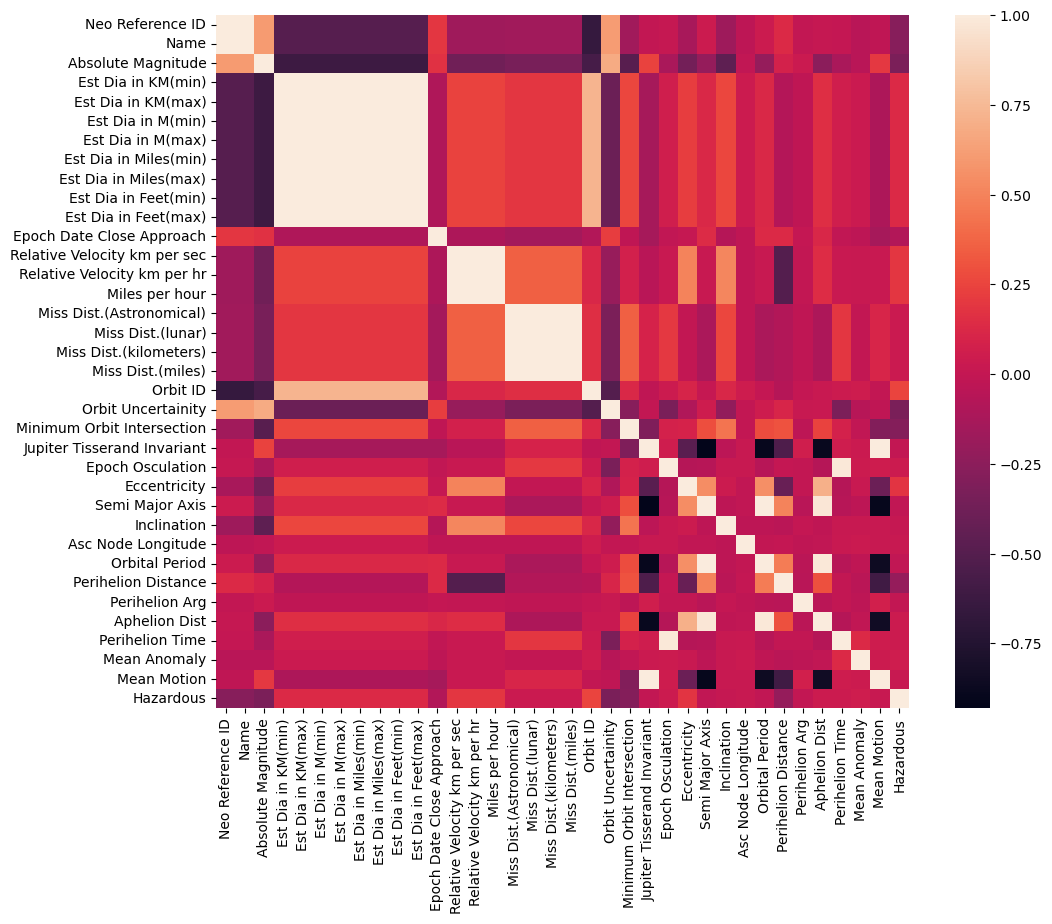

In [9]:
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(correlation_matrix, vmax = 1, square = True)

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [11]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y,test_size = 0.2 , random_state = 0)

In [62]:
def classifiers(clf, name):
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
    cm_test = confusion_matrix(y_test, y_pred)
    cm_train = confusion_matrix(y_train, y_pred_train)
    acc_sc = accuracy_score(y_test, y_pred)
    prec_sc = precision_score(y_test, y_pred)
    rec_sc = recall_score(y_test, y_pred)
    f_sc = f1_score(y_test, y_pred)
    
    print('Accuracy of {} for Test Set = {}'.format(name, (cm_test[1][1] + cm_test[0][0])/len(y_test)))
    print('Accuracy of {} for Train Set = {}'.format(name, (cm_train[1][1] + cm_train[0][0])/len(y_train)))
    print()
    
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix - Test Set')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    plt.subplot(1, 2, 2)
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title('Confusion Matrix - Train Set')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
    return cm_train, cm_test, acc_sc, prec_sc, rec_sc, f_sc

## Gaussian NB

Accuracy of Naive Bayes for Test Set = 0.8454157782515992
Accuracy of Naive Bayes for Train Set = 0.8372899439850627



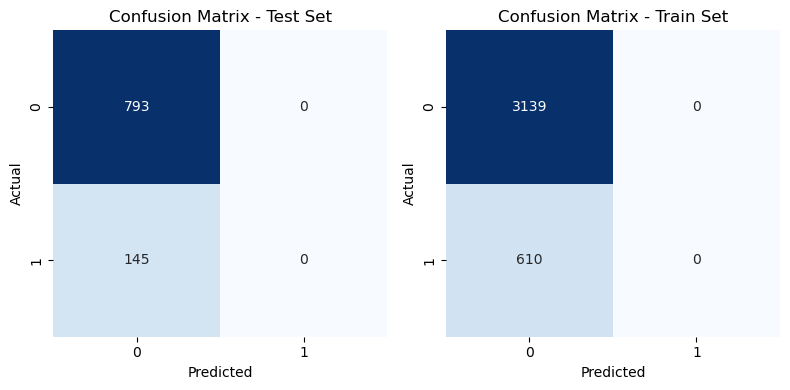

In [63]:
from sklearn.naive_bayes import GaussianNB
clf1 = GaussianNB()
clf1.fit(X_train, y_train)
cm_train, cm_test, acc1, prec1, rec1, f_sc1 = classifiers(clf1, 'Naive Bayes')

## SVM

Accuracy of SVC for Test Set = 0.8454157782515992
Accuracy of SVC for Train Set = 0.8372899439850627



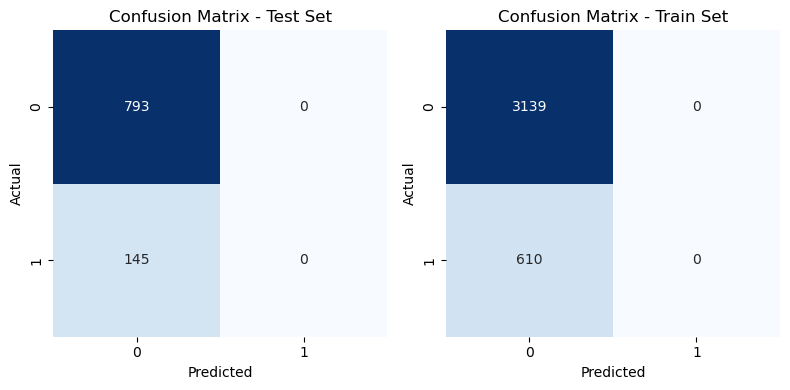

In [64]:
from sklearn.svm import SVC
clf2 = SVC(kernel = 'rbf')
clf2.fit(X_train, y_train)
cm_train, cm_test, acc2, prec2, rec2, f_sc2 = classifiers(clf2, 'SVC')

## Decision Tree

Accuracy of Decision Tree for Test Set = 0.9925373134328358
Accuracy of Decision Tree for Train Set = 1.0



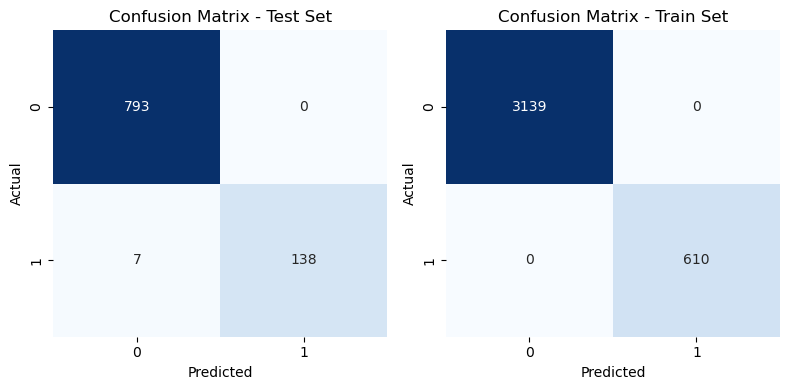

In [65]:
from sklearn.tree import DecisionTreeClassifier as DTC
clf3 = DTC()
clf3.fit(X_train, y_train)
cm_train, cm_test, acc3, prec3, rec3, f_sc3 = classifiers(clf3, 'Decision Tree')

## Logistic Regression

Accuracy of Logistic Regression for Test Set = 0.8454157782515992
Accuracy of Logistic Regression for Train Set = 0.8372899439850627



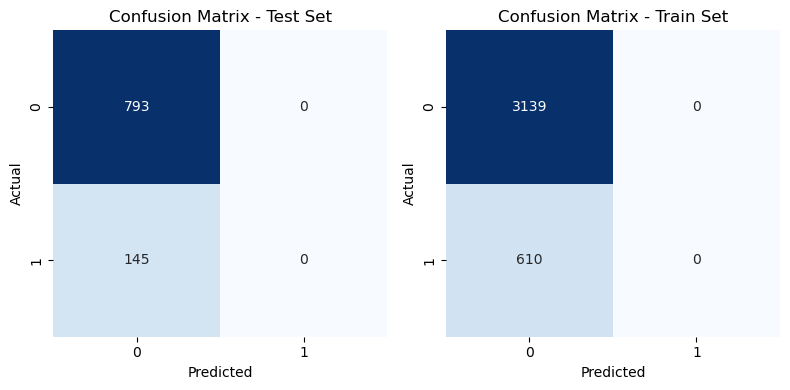

In [66]:
from sklearn.linear_model import LogisticRegression
clf4 = LogisticRegression()
clf4.fit(X_train, y_train)
cm_train, cm_test, acc4, prec4, rec4, f_sc4 = classifiers(clf4, 'Logistic Regression')

## K-Nearest Neighbour

Accuracy of K-Nearest Neighbour for Test Set = 0.8464818763326226
Accuracy of K-Nearest Neighbour for Train Set = 0.8375566817818085



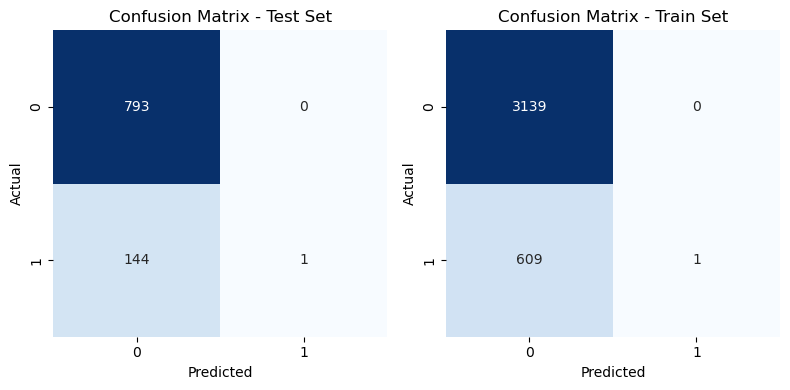

In [67]:
from sklearn.neighbors import KNeighborsClassifier
clf5 = KNeighborsClassifier(n_neighbors = 10)
clf5.fit(X_train, y_train)
cm_train, cm_test, acc5, prec5, rec5, f_sc5 = classifiers(clf5, 'K-Nearest Neighbour')

## Random Forest

Accuracy of Random Forest for Test Set = 0.9925373134328358
Accuracy of Random Forest for Train Set = 1.0



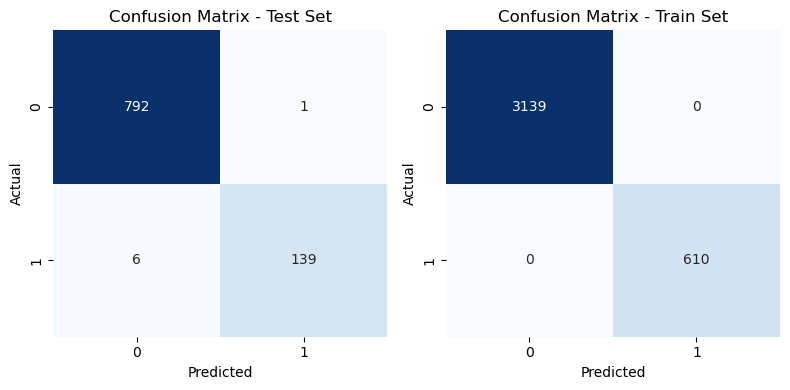

In [68]:
from sklearn.ensemble import RandomForestClassifier as RFC
clf6 = RFC()
clf6.fit(X_train, y_train)
cm_train, cm_test, acc6, prec6, rec6, f_sc6 = classifiers(clf6, 'Random Forest')

## LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7684
[LightGBM] [Info] Number of data points in the train set: 3749, number of used features: 35
[LightGBM] [Info] Start training from score 0.162710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

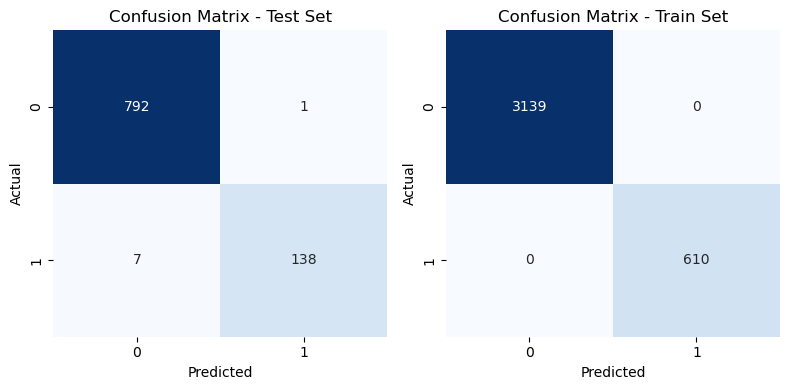

In [69]:
import lightgbm as lgb
    
d_train = lgb.Dataset(X_train, label = y_train)
params = {}
clf7 = lgb.train(params, d_train, 100)
y_pred = clf7.predict(X_test)
y_pred_train = clf7.predict(X_train)

for i in range(0, len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred[i] = 0
    else:
        y_pred[i] = 1
        
for i in range(0, len(y_pred_train)):
    if y_pred_train[i] < 0.5:
        y_pred_train[i] = 0
    else:
        y_pred_train[i] = 1


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_test = confusion_matrix(y_test, y_pred)
cm_train = confusion_matrix(y_train, y_pred_train)
acc7 = accuracy_score(y_test, y_pred)
prec7 = precision_score(y_test, y_pred)
rec7 = recall_score(y_test, y_pred)
f_sc7 = f1_score(y_test, y_pred)

print('\nAccuracy of {} for Test Set = {}'.format('LightGBM', (cm_test[1][1] + cm_test[0][0])/len(y_test)))
print('Accuracy of {} for Train Set = {}'.format('LightGBM', (cm_train[1][1] + cm_train[0][0])/len(y_train)))
print()

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
    
plt.subplot(1, 2, 2)
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
    
plt.tight_layout()
plt.show()

In [35]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.3 MB 2.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.5/1.3 MB 3.8 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 4.2 MB/s eta 0:00:01
   --------------------------------- ------ 1.1/1.3 MB 4.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.5 MB/s eta 0:00:00


In [70]:
models = pd.DataFrame({'Model':['Gaussian NB', 'SVM', 'DecisionTree', 
                                'LogisticRegression', 'KNN', 'Random Forest', 'LightGBM'],
                       'Accuracy':[acc1, acc2, acc3, acc4, acc5, acc6, acc7],
                       'Precision':[prec1, prec2, prec3, prec4, prec5, prec6, prec7],
                       'Recall':[rec1, rec2, rec3, rec4, rec5, rec6, rec7],
                      'F1 Score':[f_sc1, f_sc2, f_sc3, f_sc4, f_sc5, f_sc6, f_sc7]})
models.sort_values(by = 'Accuracy', ascending = False)

,Model,Accuracy,Precision,Recall,F1 Score
2,DecisionTree,0.992537,1.000000,0.951724,0.975265
5,Random Forest,0.992537,0.992857,0.958621,0.975439
6,LightGBM,0.991471,0.992806,0.951724,0.971831
4,KNN,0.846482,1.000000,0.006897,0.013699
0,Gaussian NB,0.845416,0.000000,0.000000,0.000000
1,SVM,0.845416,0.000000,0.000000,0.000000
3,LogisticRegression,0.845416,0.000000,0.000000,0.000000


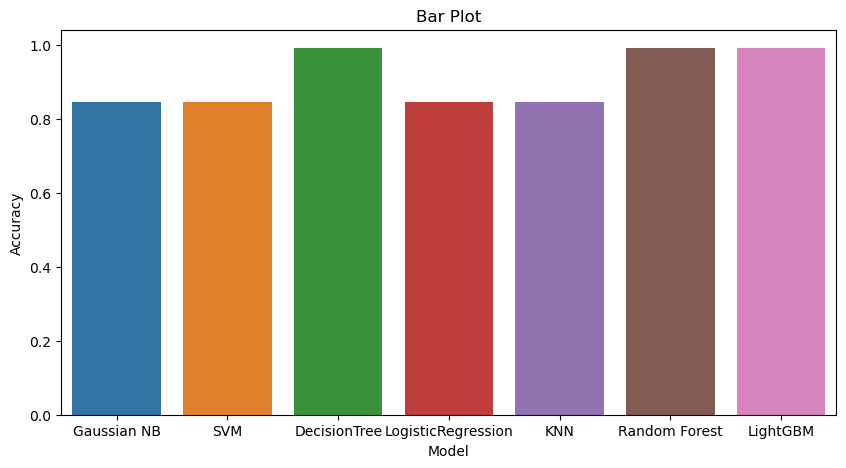

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data=models)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Bar Plot')

plt.show()